# Propagating uncertainties in fluid inclusion barometry
- This notebook shows how to propagate uncertainty when performing fluid inclusion barometry

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'0.0.91'

### Load in the data
- You can call your column headings whatever you want, just swap the text when it references them later

In [3]:
# Get from here - https://github.com/PennyWieser/DiadFit/blob/main/docs/Examples/EOS_calculations/Fluid_Inclusion_Densities_Example1.xlsx
df=pd.read_excel('Fluid_Inclusion_Densities_Example1.xlsx', sheet_name='Diff_Temps')
df.head()

,Sample,Density_g_cm3,T_C,XH2O,Host_Fo_content
0,FI1,0.458055,1048.898738,0.086258,0.897797
1,FI2,0.492947,1015.924767,0.085212,0.831850
2,FI4,0.484594,1041.589916,0.085462,0.883180
3,FI5,0.494431,1034.935183,0.085167,0.869870
4,FI7,0.476416,1034.820102,0.085708,0.869640


## Propagating uncertainty in temperature
- Lets say the uncertainty in temperature is +-50K. So this is an absolute error, and we want temperature distributed normally
- We want to use a single step profile initially to convert pressure to depth
- We want to make 1000 duplicates per FI with temperature varying by 1 sigma=50K
- It outputs MC_Av, which is the average for each fluid inclusion, and MC_All, which contains rows for each of the N duplicates you asked for appended end-on-end


We are not using multiprocessing based on your selected EOS. You can override this by setting multiprocess=True in the function, but for SP94 and SW96 it might actually be slower


Processing: 100%|██████████| 60/60 [00:01<00:00, 34.62it/s]


,Filename,CO2_dens_gcm3,SingleCalc_D_km,SingleCalc_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,std_dev_MC_P_kbar_from_percentile,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,std_dev_MC_D_km_from_percentile,T_K_input,error_T_K,CO2_dens_gcm3_input,error_CO2_dens_gcm3,crust_dens_kgm3_input,error_crust_dens_kgm3,model,EOS
0,FI1,0.458055,6.357853,1.684004,1.685286,1.685877,0.072431,0.071137,6.362691,6.364923,0.273457,0.268572,1322.048738,50,0.458055,0,2700,0.0,None,SW96
1,FI2,0.492947,6.918818,1.832587,1.831854,1.832474,0.086385,0.087010,6.916050,6.918390,0.326140,0.328502,1289.074767,50,0.492947,0,2700,0.0,None,SW96
2,FI4,0.484594,6.891995,1.825483,1.822461,1.821793,0.082639,0.082694,6.880586,6.878064,0.311999,0.312206,1314.739916,50,0.484594,0,2700,0.0,None,SW96
3,FI5,0.494431,7.071963,1.873151,1.874001,1.874879,0.080538,0.082679,7.075173,7.078488,0.304065,0.312150,1308.085183,50,0.494431,0,2700,0.0,None,SW96
4,FI7,0.476416,6.670854,1.766909,1.767672,1.766460,0.079613,0.077064,6.673735,6.669158,0.300574,0.290949,1307.970102,50,0.476416,0,2700,0.0,None,SW96


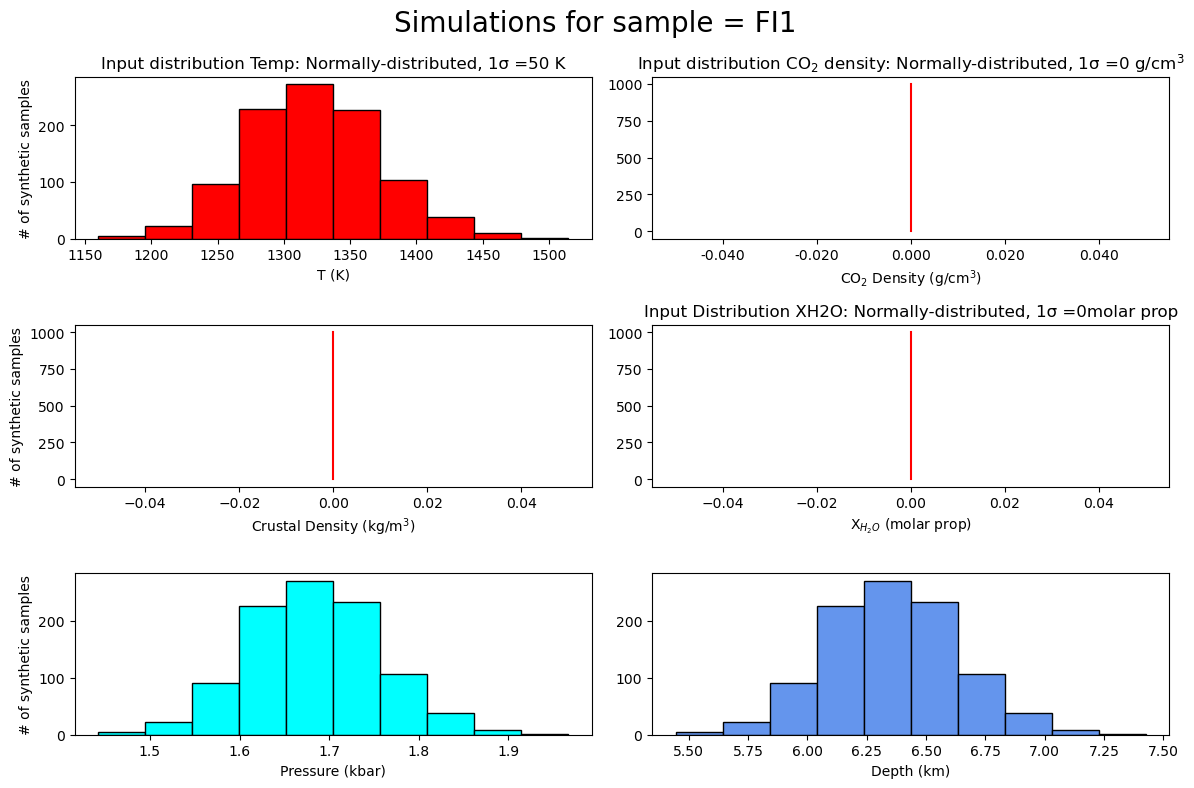

In [4]:
MC_Av_Tonly, MC_All_Tonly, fig=pf.propagate_FI_uncertainty(T_K=df['T_C']+273.15,
error_T_K=50, error_type_T_K='Abs', error_dist_T_K='normal',
                        CO2_dens_gcm3=df['Density_g_cm3'],
                        sample_ID=df['Sample'],
                        crust_dens_kgm3=2700, EOS='SW96',
                        N_dup=1000, fig_i=0, plot_figure=True)
MC_Av_Tonly.head()

### Plot each FI and its 1 sigma error
-  Lets plot the pressure of the inputted FI (SingleFI_P_kbar), and then the standard deviation of the MC simulation against the Fo content

In [5]:
MC_Av_Tonly.head()

,Filename,CO2_dens_gcm3,SingleCalc_D_km,SingleCalc_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,std_dev_MC_P_kbar_from_percentile,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,std_dev_MC_D_km_from_percentile,T_K_input,error_T_K,CO2_dens_gcm3_input,error_CO2_dens_gcm3,crust_dens_kgm3_input,error_crust_dens_kgm3,model,EOS
0,FI1,0.458055,6.357853,1.684004,1.685286,1.685877,0.072431,0.071137,6.362691,6.364923,0.273457,0.268572,1322.048738,50,0.458055,0,2700,0.0,None,SW96
1,FI2,0.492947,6.918818,1.832587,1.831854,1.832474,0.086385,0.087010,6.916050,6.918390,0.326140,0.328502,1289.074767,50,0.492947,0,2700,0.0,None,SW96
2,FI4,0.484594,6.891995,1.825483,1.822461,1.821793,0.082639,0.082694,6.880586,6.878064,0.311999,0.312206,1314.739916,50,0.484594,0,2700,0.0,None,SW96
3,FI5,0.494431,7.071963,1.873151,1.874001,1.874879,0.080538,0.082679,7.075173,7.078488,0.304065,0.312150,1308.085183,50,0.494431,0,2700,0.0,None,SW96
4,FI7,0.476416,6.670854,1.766909,1.767672,1.766460,0.079613,0.077064,6.673735,6.669158,0.300574,0.290949,1307.970102,50,0.476416,0,2700,0.0,None,SW96


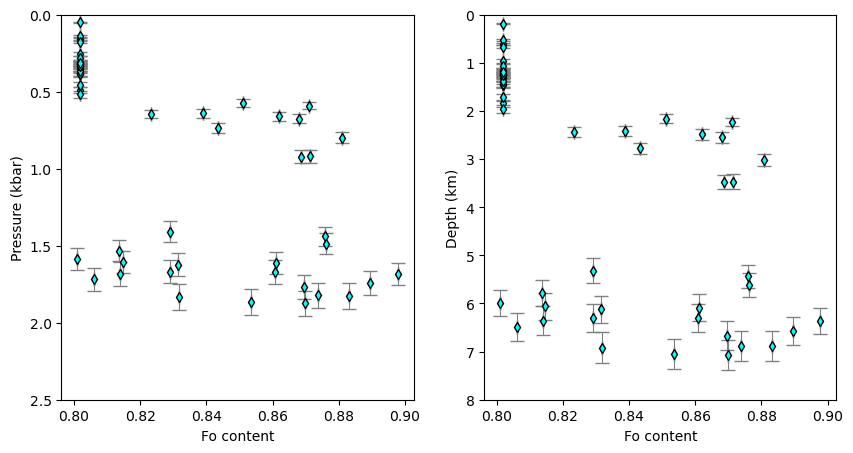

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.errorbar(df['Host_Fo_content'], 
             MC_Av_Tonly['SingleCalc_P_kbar'],
             xerr=0, yerr=MC_Av_Tonly['std_dev_MC_P_kbar'],
             fmt='d', ecolor='grey', elinewidth=0.8, mfc='cyan', ms=5, mec='k', capsize=5)

ax1.set_xlabel('Fo content')
ax1.set_ylabel('Pressure (kbar)')

ax2.errorbar(df['Host_Fo_content'], 
             MC_Av_Tonly['SingleCalc_D_km'],
             xerr=0, yerr=MC_Av_Tonly['std_dev_MC_D_km'],
             fmt='d', ecolor='grey', elinewidth=0.8, mfc='cyan', ms=5, mec='k', capsize=5)
ax2.set_xlabel('Fo content')
ax2.set_ylabel('Depth (km)')


ax1.set_ylim([0, 2.5])
ax2.set_ylim([0, 8])
ax1.invert_yaxis()
ax2.invert_yaxis()

## Propagating uncertainty in CO2 Density
- Lets say the uncertainty in CO2 density is +-10%, in reality, this will vary greatly between instruments, as well with the absolute density (e.g. more like +-20% for the very weakest diads, more like +-5% for the densest).

We are not using multiprocessing based on your selected EOS. You can override this by setting multiprocess=True in the function, but for SP94 and SW96 it might actually be slower


Processing: 100%|██████████| 60/60 [00:01<00:00, 32.19it/s]


,Filename,CO2_dens_gcm3,SingleCalc_D_km,SingleCalc_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,std_dev_MC_P_kbar_from_percentile,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,std_dev_MC_D_km_from_percentile,T_K_input,error_T_K,CO2_dens_gcm3_input,error_CO2_dens_gcm3,crust_dens_kgm3_input,error_crust_dens_kgm3,model,EOS
0,FI1,0.458055,6.357853,1.684004,1.698304,1.678897,0.261998,0.253055,6.411839,6.338570,0.989156,0.955393,1322.048738,0,0.458055,10,2700,0.0,None,SW96
1,FI2,0.492947,6.918818,1.832587,1.854009,1.842078,0.285182,0.275894,6.999695,6.954650,1.076688,1.041619,1289.074767,0,0.492947,10,2700,0.0,None,SW96
2,FI4,0.484594,6.891995,1.825483,1.842121,1.824761,0.281790,0.279376,6.954811,6.889269,1.063880,1.054768,1314.739916,0,0.484594,10,2700,0.0,None,SW96
3,FI5,0.494431,7.071963,1.873151,1.886170,1.861636,0.300329,0.298863,7.121114,7.028488,1.133874,1.128338,1308.085183,0,0.494431,10,2700,0.0,None,SW96
4,FI7,0.476416,6.670854,1.766909,1.789624,1.780613,0.280114,0.282397,6.756614,6.722593,1.057553,1.066171,1307.970102,0,0.476416,10,2700,0.0,None,SW96


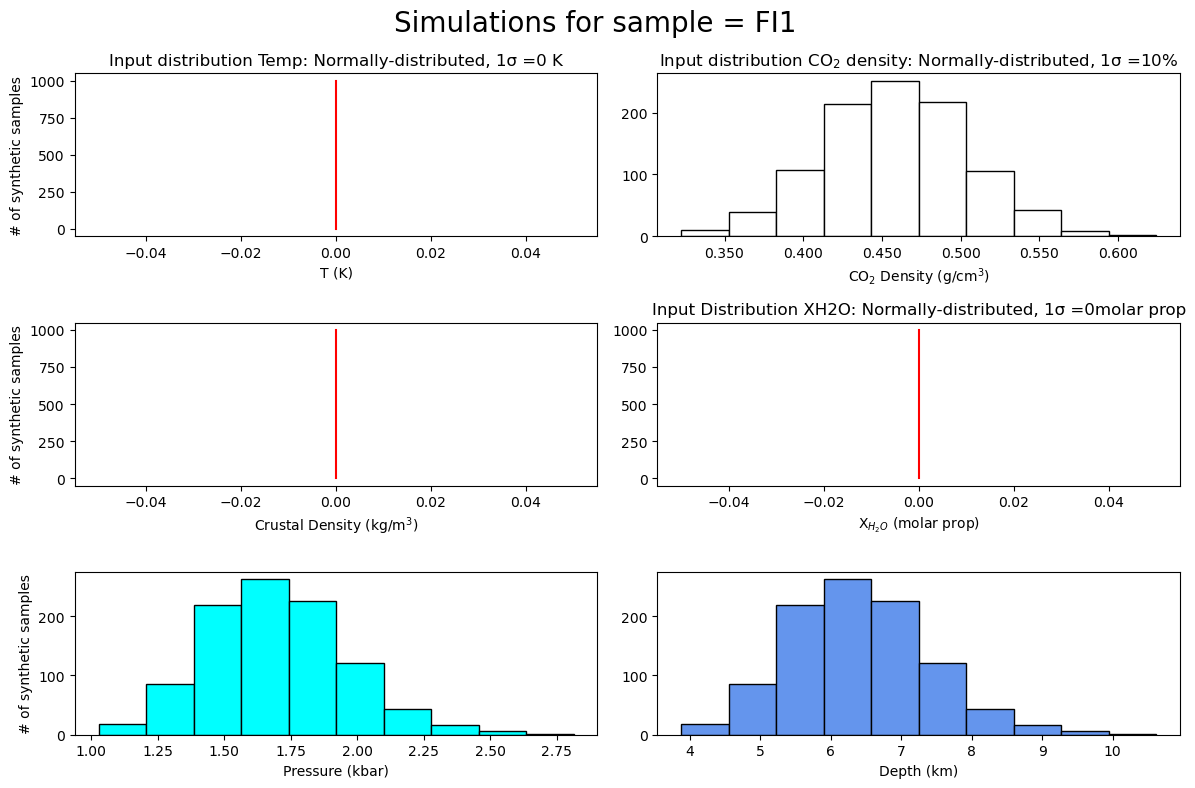

In [7]:
MC_Av_rhoonly, MC_All_rhoonly, fig=pf.propagate_FI_uncertainty(T_K=df['T_C']+273.15,
error_CO2_dens=10, error_type_CO2_dens='Perc', error_dist_CO2_dens='normal',
                        CO2_dens_gcm3=df['Density_g_cm3'],
                        sample_ID=df['Sample'],
                        crust_dens_kgm3=2700,
                        N_dup=1000, fig_i=0, plot_figure=True)
MC_Av_rhoonly.head()

## Simulation varying both temperature and CO$_2$ density
- Lets say you think you have +-30K uncertainty in temp, and +-0.02 g/cm3 in density

We are not using multiprocessing based on your selected EOS. You can override this by setting multiprocess=True in the function, but for SP94 and SW96 it might actually be slower


Processing: 100%|██████████| 60/60 [00:01<00:00, 33.64it/s]


,Filename,CO2_dens_gcm3,SingleCalc_D_km,SingleCalc_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,std_dev_MC_P_kbar_from_percentile,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,std_dev_MC_D_km_from_percentile,T_K_input,error_T_K,CO2_dens_gcm3_input,error_CO2_dens_gcm3,crust_dens_kgm3_input,error_crust_dens_kgm3,model,EOS
0,FI1,0.458055,6.357853,1.684004,1.688554,1.686840,0.119360,0.116826,6.375029,6.368558,0.450637,0.441071,1322.048738,30,0.458055,0.02,2700,0.0,None,SW96
1,FI2,0.492947,6.918818,1.832587,1.829419,1.823433,0.126059,0.125995,6.906858,6.884256,0.475929,0.475686,1289.074767,30,0.492947,0.02,2700,0.0,None,SW96
2,FI4,0.484594,6.891995,1.825483,1.821729,1.820861,0.131336,0.131174,6.877825,6.874546,0.495852,0.495238,1314.739916,30,0.484594,0.02,2700,0.0,None,SW96
3,FI5,0.494431,7.071963,1.873151,1.874064,1.866136,0.125095,0.124611,7.075411,7.045478,0.472290,0.470461,1308.085183,30,0.494431,0.02,2700,0.0,None,SW96
4,FI7,0.476416,6.670854,1.766909,1.770078,1.767223,0.125171,0.121619,6.682818,6.672038,0.472575,0.459166,1307.970102,30,0.476416,0.02,2700,0.0,None,SW96


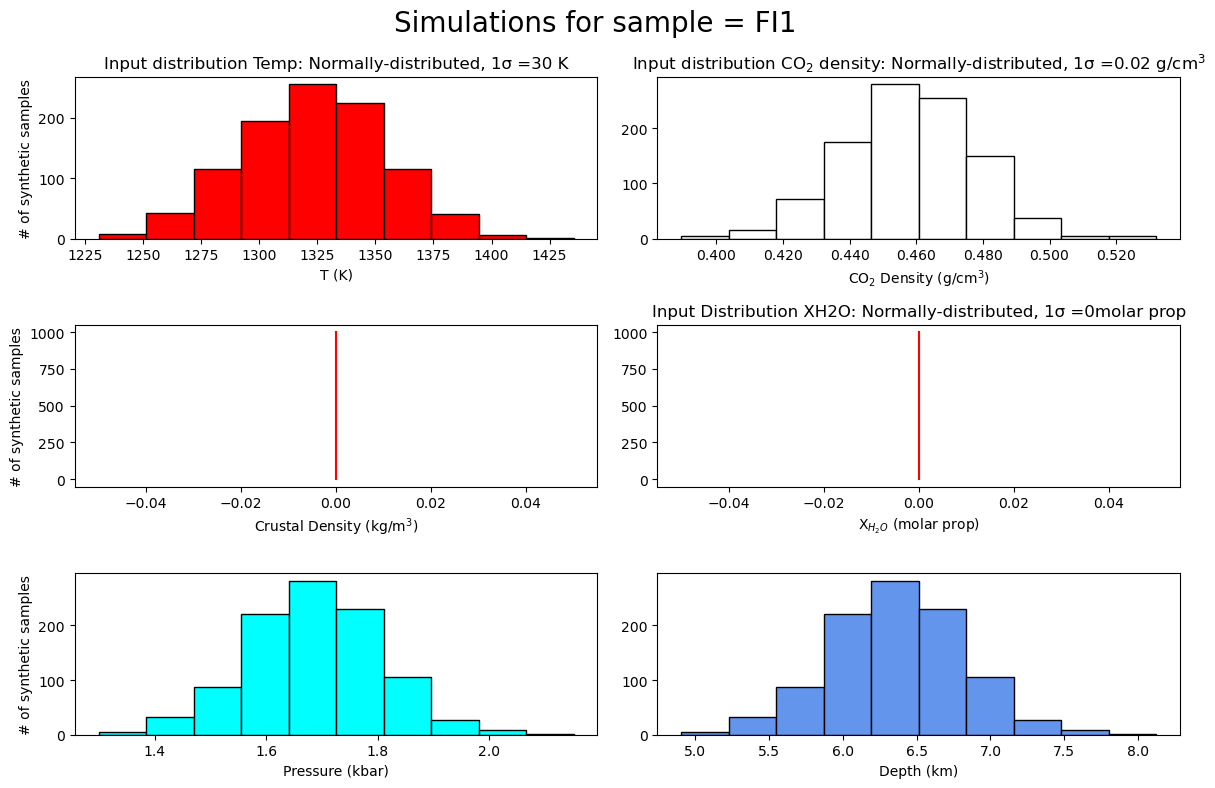

In [8]:
MC_Av_rho_T, MC_All_rho_T, fig=pf.propagate_FI_uncertainty(
T_K=df['T_C']+273.15,
error_CO2_dens=0.02, error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
error_T_K=30, error_type_T_K='Abs', error_dist_T_K='normal',
CO2_dens_gcm3=df['Density_g_cm3'],
sample_ID=df['Sample'],
crust_dens_kgm3=2700,
N_dup=1000, fig_i=0, plot_figure=True)
MC_Av_rho_T.head()

## Uncertainty in Temp, CO2 and Crustal density
- Here we also add a 5% uncertainty in crustal density.

We are not using multiprocessing based on your selected EOS. You can override this by setting multiprocess=True in the function, but for SP94 and SW96 it might actually be slower


Processing: 100%|██████████| 60/60 [00:01<00:00, 32.86it/s]


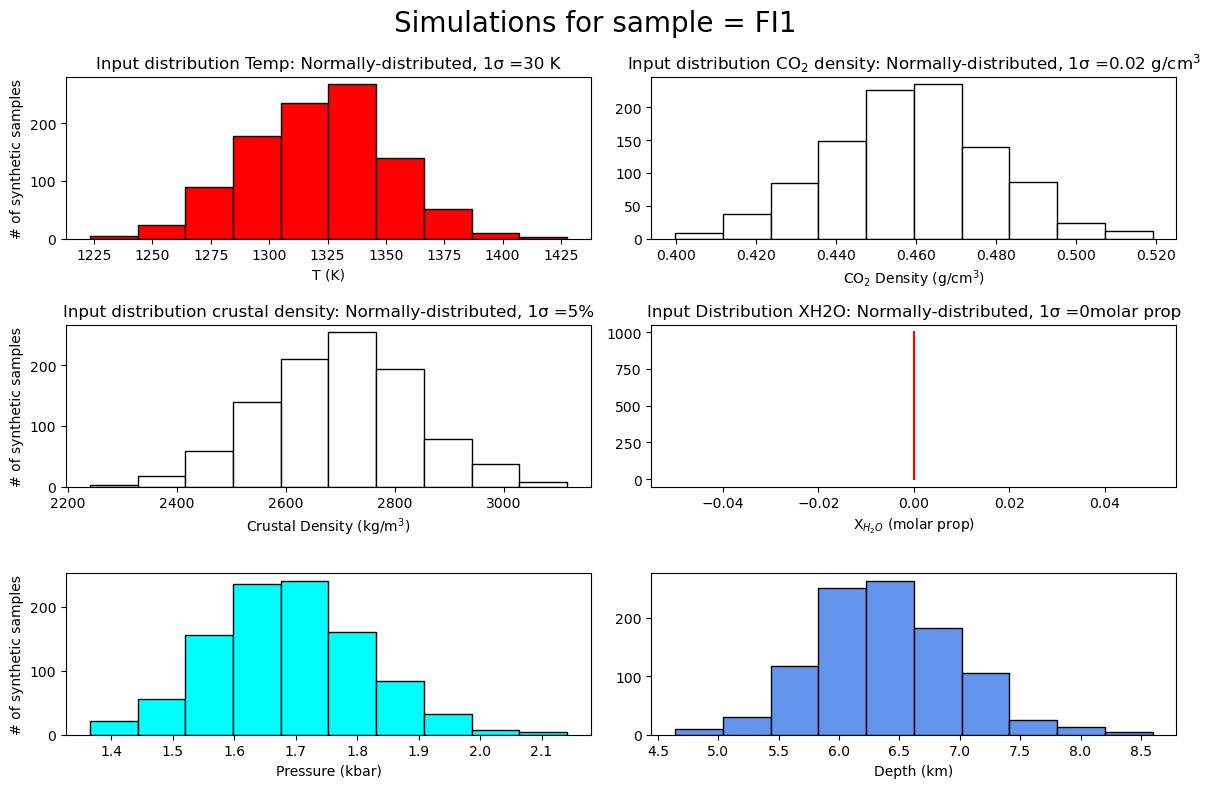

In [9]:
MC_Av_rho_T_CD, MC_All_rho_T_CD, fig=pf.propagate_FI_uncertainty(T_K=df['T_C']+273.15,
error_CO2_dens=0.02, error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
error_T_K=30, error_type_T_K='Abs', error_dist_T_K='normal',
crust_dens_kgm3=2700,
error_crust_dens=5, error_type_crust_dens='Perc', error_dist_crust_dens='normal',                                            
CO2_dens_gcm3=df['Density_g_cm3'],
sample_ID=df['Sample'],
N_dup=1000, fig_i=0, plot_figure=True )


fig.savefig('MonteCarlo_Sample1_png', dpi=300)

In [10]:
MC_Av_rho_T_CD.head()

,Filename,CO2_dens_gcm3,SingleCalc_D_km,SingleCalc_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,std_dev_MC_P_kbar_from_percentile,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,std_dev_MC_D_km_from_percentile,T_K_input,error_T_K,CO2_dens_gcm3_input,error_CO2_dens_gcm3,crust_dens_kgm3_input,error_crust_dens_kgm3,model,EOS
0,FI1,0.458055,6.357853,1.684004,1.690564,1.686960,0.125152,0.121030,6.397435,6.360036,0.584467,0.557955,1322.048738,30,0.458055,0.02,2700,5.0,None,SW96
1,FI2,0.492947,6.918818,1.832587,1.837438,1.838429,0.134013,0.133324,6.950017,6.934502,0.612384,0.599707,1289.074767,30,0.492947,0.02,2700,5.0,None,SW96
2,FI4,0.484594,6.891995,1.825483,1.820464,1.817220,0.127858,0.130603,6.888725,6.887654,0.595282,0.597282,1314.739916,30,0.484594,0.02,2700,5.0,None,SW96
3,FI5,0.494431,7.071963,1.873151,1.878002,1.873677,0.135345,0.129115,7.084029,7.066155,0.622443,0.602472,1308.085183,30,0.494431,0.02,2700,5.0,None,SW96
4,FI7,0.476416,6.670854,1.766909,1.766453,1.764747,0.126029,0.122503,6.685152,6.686630,0.579506,0.572458,1307.970102,30,0.476416,0.02,2700,5.0,None,SW96


## Uncertainty in Temp, CO2 density, crustal density and XH2O
- If XH2O is not None, the function will use the EOS of Duan and Zhang (2006) to propagate this additional source of uncertainty. Note, these calculations are an order of magnitude slower, so it may take several minutes to run. We are using multiprocessing to speed it up. 
- Here we consider XH2O=0.1, with a uniformly distributed error of +-0.05

You have entered a value for XH2O, so we are now using the EOS of Duan and Zhang 200 regardless of what model you selected. If you dont want this, specify XH2O=None
Please note, the DZ2006 EOS is about 5-40X slower to run than the SP94 and SW94 EOS
We are using multiprocessing based on your selected EOS. You can override this by setting multiprocess=False in the function, but it might slow it down a lot
Number of processors:  8


c:\users\penny\box\berkeley_new\diadfit_outer\src\DiadFit\error_propagation.py:739: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'DZ06' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_step.at[i, key] = value


,Filename,i,CO2_density_input,SingleCalc_D_km,SingleCalc_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,std_dev_MC_P_kbar_from_percentile,Mean_MC_D_km,...,T_K_input,error_T_K,CO2_dens_gcm3_input,error_CO2_dens_gcm3,crust_dens_kgm3_input,error_crust_dens_kgm3,model,EOS,XH2O_input,error_XH2O
0,FI1,0.0,0.458055,7.291610,1.931329,1.946028,1.935574,0.192155,0.182582,7.374642,...,1322.048738,30.0,0.458055,0.02,2700.0,5.0,NaN,DZ06,0.1,0.05
1,FI2,1.0,0.492947,7.905409,2.093906,2.121787,2.098956,0.212000,0.205083,8.040700,...,1289.074767,30.0,0.492947,0.02,2700.0,5.0,NaN,DZ06,0.1,0.05
2,FI4,2.0,0.484594,7.869712,2.084451,2.112670,2.089794,0.210073,0.202420,8.006136,...,1314.739916,30.0,0.484594,0.02,2700.0,5.0,NaN,DZ06,0.1,0.05
3,FI5,3.0,0.494431,8.089363,2.142630,2.170117,2.148561,0.216681,0.209704,8.223869,...,1308.085183,30.0,0.494431,0.02,2700.0,5.0,NaN,DZ06,0.1,0.05
4,FI7,4.0,0.476416,7.601455,2.013397,2.043449,2.019502,0.202435,0.195015,7.743774,...,1307.970102,30.0,0.476416,0.02,2700.0,5.0,NaN,DZ06,0.1,0.05


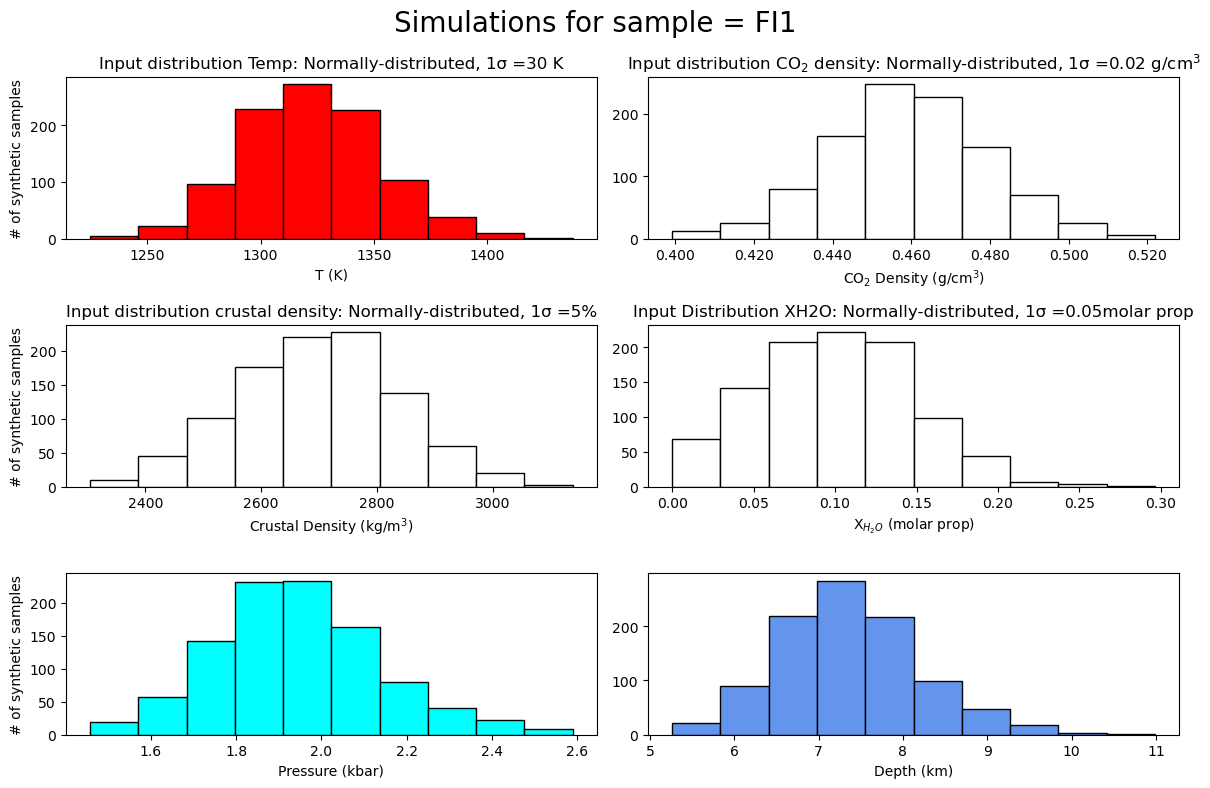

In [11]:

MC_Av_rho_T_CDH, MC_All_rho_T_CDH, fig=pf.propagate_FI_uncertainty(T_K=df['T_C']+273.15,
error_CO2_dens=0.02, error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
error_T_K=30, error_type_T_K='Abs', error_dist_T_K='normal',
crust_dens_kgm3=2700,
error_crust_dens=5, error_type_crust_dens='Perc', error_dist_crust_dens='normal',                                            
CO2_dens_gcm3=df['Density_g_cm3'],
XH2O=0.1, error_XH2O=0.05, error_type_XH2O='Abs', error_dist_XH2O='normal',  
sample_ID=df['Sample'],
N_dup=1000, fig_i=0, plot_figure=True )
MC_Av_rho_T_CDH.head()


In [12]:
fig.savefig('MC for paper.png', dpi=300)